# ML BAYES

In [340]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [341]:
df = pd.read_csv('../data/raw/playstore_reviews.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


## Elimino la columna que nos nos sirve

In [342]:
df = df.drop(columns=["package_name"])


## Texto limpio

In [343]:
df["review"] = df["review"].str.strip().str.lower()


# split

In [344]:
X = df["review"]
y = df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)


In [345]:
X_train.head()

464    my texts aren't delivering. i've checked my in...
871    classic game ruined by ads. uninstalled this o...
506    brilliant! the best application i've found so ...
147    suggestion. i given 5 stars to this game,  bec...
488    excellent my entire team would be lost without...
Name: review, dtype: object

In [346]:
y.unique()

array([0, 1])

# Texto vectorizado

In [347]:
vec_model = CountVectorizer(stop_words="english")

X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec = vec_model.transform(X_test).toarray()

## Modelado y entrenamiento

**Modelo MultinomialNB**

In [348]:
multiNB = MultinomialNB()
multiNB.fit(X_train_vec, y_train)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [349]:
pred_multi = multiNB.predict(X_test_vec)
print("Accuracy MultinomialNB:", accuracy_score(y_test, pred_multi))
print(classification_report(y_test, pred_multi))

Accuracy MultinomialNB: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.78      0.69      0.73        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



# Predicciones


In [350]:
y_pred_train = multiNB.predict(X_train_vec)
y_pred_test = multiNB.predict(X_test_vec)

y_pred_test 


array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0])

## Metricas Multinominal

In [351]:
metrics_multi = {"Accuracy Test ": accuracy_score(y_test, y_pred_test),
           "Accuracy Train: ": accuracy_score(y_train, y_pred_train)}

metrics_multi

{'Accuracy Test ': 0.8156424581005587, 'Accuracy Train: ': 0.9550561797752809}

**Modelo BernoulliNB**

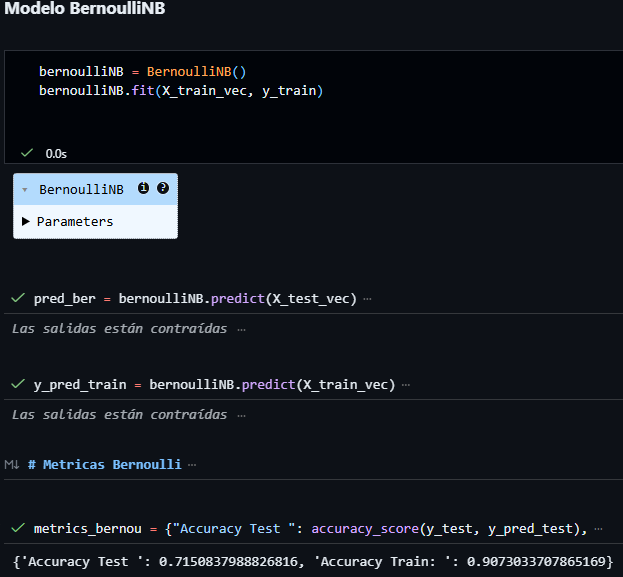

# Prediccion / multinominal
>
> - Al ser ´Multinominal´ con mayor prediccion utilizare ese metodo

In [352]:
metrics_multi = {"Accuracy Test ": accuracy_score(y_test, y_pred_test),
           "Accuracy Train: ": accuracy_score(y_train, y_pred_train)}

metrics_multi

{'Accuracy Test ': 0.8156424581005587, 'Accuracy Train: ': 0.9550561797752809}

In [353]:
vec_model = CountVectorizer(stop_words="english")
X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec  = vec_model.transform(X_test).toarray()


In [354]:
multiNB = MultinomialNB()

hyperparams = {
    "alpha": np.linspace(0.01, 10.0, 200),
    "fit_prior": [True, False]
}

random_search = RandomizedSearchCV(
    multiNB,
    hyperparams,
    n_iter=50,
    scoring="accuracy",
    cv=5,
    random_state=18,
    n_jobs=-1,
    verbose=1
)


random_search


,estimator,MultinomialNB()
,param_distributions,"{'alpha': array([ 0.01 ... 10. ]), 'fit_prior': [True, False]}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,18
,error_score,nan


In [355]:
random_search.fit(X_train_vec, y_train)

random_search.best_params_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'fit_prior': True, 'alpha': np.float64(0.1606030150753769)}

In [356]:
best_model = random_search.best_estimator_

best_model

,alpha,np.float64(0.1606030150753769)
,force_alpha,True
,fit_prior,True
,class_prior,None
